# Análise Estatística de Resultados da Lotofácil

Este projeto busca verificar a justiça dos sorteios da Lotofácil utilizando métodos estatísticos e análise exploratória de dados. 
O objetivo é avaliar se os números sorteados seguem uma distribuição uniforme e praticar habilidades de análise de dados para projetos reais.

### Objetivos principais:
- Carregar e limpar os dados.
- Explorar a frequência dos números sorteados.
- Visualizar os dados com gráficos.
- Aplicar o teste Qui-Quadrado para verificar uniformidade.
- Comparar os sorteios reais com simulações.


In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

## 1. Carregando os dados

In [3]:
# Carregando os dados do arquivo Excel
dados = pd.read_excel('Lotofacil.xlsx')
dados.head()

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00",48807,"R$4,00",257593,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00",81252,"R$4,00",478188,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$10,00",96244,"R$4,00",608211,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$10,00",123912,"R$4,00",706657,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$10,00",195636,"R$4,00",860992,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio para o próximo concurso (...


## 2. Selecionando as colunas relevantes

In [4]:
# Seleção de colunas importantes para a análise
colunas_relevantes = ['Concurso', 'Data Sorteio', 'Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 
                     'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15']
dados = dados[colunas_relevantes]

# Convertendo a coluna de datas para o formato datetime
dados['Data Sorteio'] = pd.to_datetime(dados['Data Sorteio'], format='%d/%m/%Y')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Concurso      3280 non-null   int64         
 1   Data Sorteio  3280 non-null   datetime64[ns]
 2   Bola1         3280 non-null   int64         
 3   Bola2         3280 non-null   int64         
 4   Bola3         3280 non-null   int64         
 5   Bola4         3280 non-null   int64         
 6   Bola5         3280 non-null   int64         
 7   Bola6         3280 non-null   int64         
 8   Bola7         3280 non-null   int64         
 9   Bola8         3280 non-null   int64         
 10  Bola9         3280 non-null   int64         
 11  Bola10        3280 non-null   int64         
 12  Bola11        3280 non-null   int64         
 13  Bola12        3280 non-null   int64         
 14  Bola13        3280 non-null   int64         
 15  Bola14        3280 non-null   int64   

## 3. Explorando a frequência dos números sorteados

In [5]:
# Calculando a frequência de cada número sorteado
bolas = dados.iloc[:, 2:]  # Todas as colunas de números
todos_numeros = bolas.values.flatten()

frequencias = pd.Series(todos_numeros).value_counts().sort_index()
frequencias

1     1975
2     1966
3     1981
4     1982
5     1977
6     1916
7     1932
8     1908
9     1963
10    2055
11    2007
12    1979
13    1993
14    1988
15    1945
16    1878
17    1928
18    1962
19    1954
20    2063
21    1946
22    1958
23    1923
24    1988
25    2033
Name: count, dtype: int64

## 4. Visualizando as frequências dos números sorteados

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16332\337451161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencias.index, y=frequencias.values, palette='viridis')


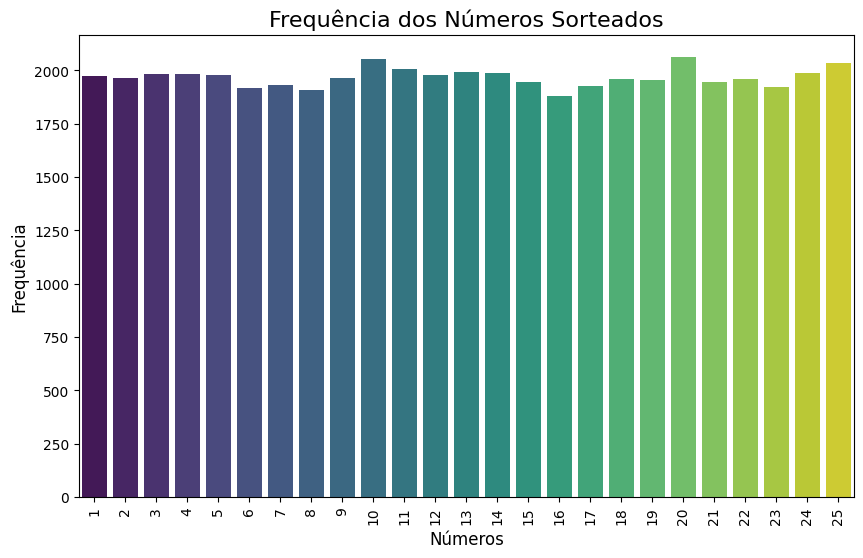

In [6]:
# Criando um gráfico de barras para as frequências
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencias.index, y=frequencias.values, palette='viridis')
plt.title('Frequência dos Números Sorteados', fontsize=16)
plt.xlabel('Números', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 5. Teste de uniformidade com o Qui-Quadrado

In [21]:
# Definindo a frequência esperada para números uniformemente sorteados
frequencia_esperada = [sum(frequencias) / len(frequencias)] * len(frequencias)

# Aplicando o teste Qui-Quadrado
chi2, p_valor = chisquare(frequencias.values, frequencia_esperada)

print(f"Valor do Qui-Quadrado: {chi2}")
print(f"P-Valor: {p_valor}")

if p_valor < 0.05:
    print("Os sorteios não parecem ser uniformes (rejeitamos H0).")
else:
    print("Os sorteios parecem ser uniformes (não rejeitamos H0).")

Valor do Qui-Quadrado: 22.90650406504065
P-Valor: 0.5253230004438803
Os sorteios parecem ser uniformes (não rejeitamos H0).


## 6. Comparando os sorteios reais com simulações

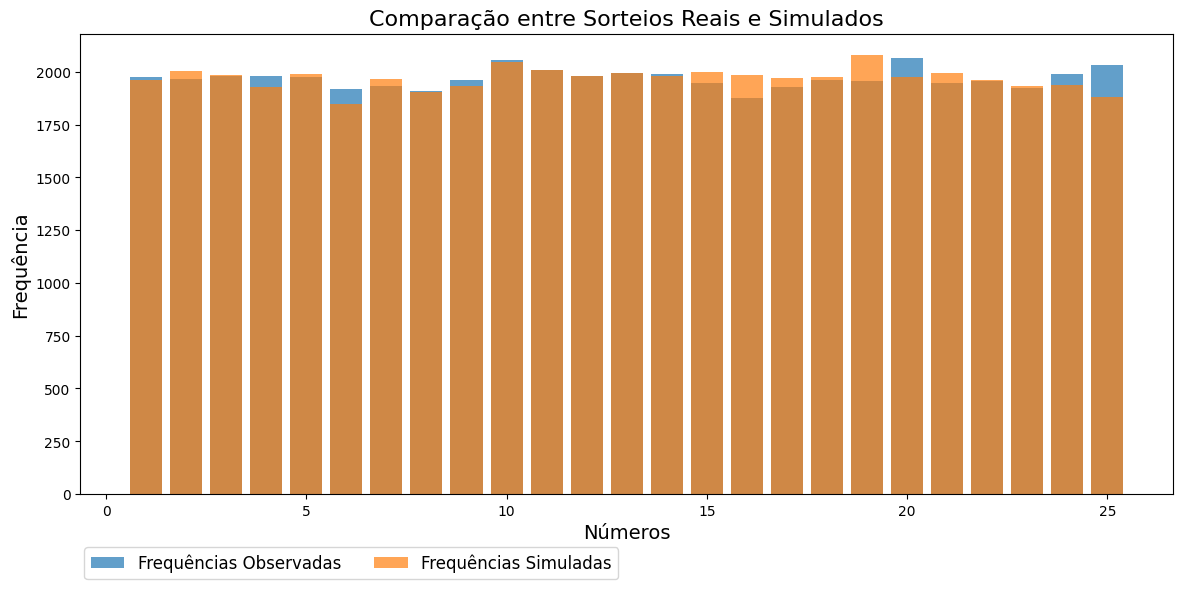

In [18]:
# Simulando 3281 sorteios com probabilidades iguais
sorteios_simulados = np.random.choice(range(1, 26), size=(3281, 15), replace=True)

# Frequências dos números simulados
frequencias_simuladas = pd.Series(sorteios_simulados.flatten()).value_counts().sort_index()

# Comparando os resultados reais e simulados
plt.figure(figsize=(12, 6))
plt.bar(frequencias.index, frequencias.values, label='Frequências Observadas', alpha=0.7)
plt.bar(frequencias_simuladas.index, frequencias_simuladas.values, label='Frequências Simuladas', alpha=0.7)
plt.title('Comparação entre Sorteios Reais e Simulados', fontsize=16)
plt.xlabel('Números', fontsize=14,)
plt.ylabel('Frequência', fontsize=14)

plt.legend(loc='right', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=12)
plt.tight_layout()
plt.show()


## 7. Conclusão

- O teste Qui-Quadrado indicou que os sorteios **seguem uma distribuição uniforme** (não rejeitamos a hipótese nula).
- As simulações reforçam que as frequências reais estão próximas do esperado para um sorteio justo.

Este projeto foi desenvolvido com o objetivo de aprender e reforçar habilidades em técnicas de análise estatística e visualização de dados, aplicando-as em um contexto prático.